<a href="https://colab.research.google.com/github/ZakyAH123/pembelajaran-mesin-ZakyAdilHakim-2211533007/blob/main/PratikumMachineLearningANN(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import lib yang dibutuhkan
  numpy: digunakan untuk operasi numerik
  ensorflow: digunakan untuk operasi deep learning
  matplotlib.pyplot: digunakan untuk menampilkan plot

In [ ]:
# import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

In [ ]:
# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

kernel: Matriks 3x3 yang digunakan untuk deteksi sisi dalam konvolusi. Ini menekankan sisi dengan menyorot perbedaan nilai pixel.

In [ ]:
# define the kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])

Load Gambar

In [ ]:
# load the image
image = tf.io.read_file('NoBitches.jpeg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

menampilkan gambar

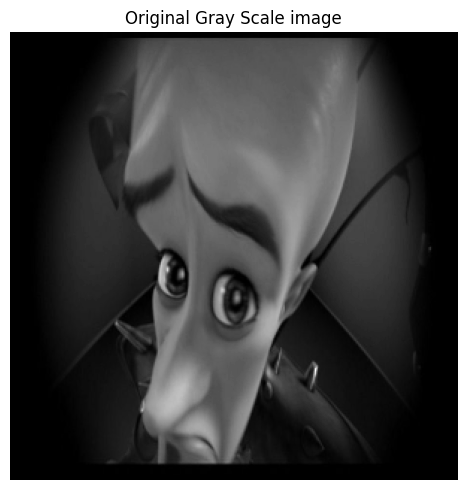

In [ ]:
# plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();

Memformat Ulang Gambar dan Kernel untuk Konvolusi
  Mengonversi gambar menjadi tipe float32
  Menambahkan dimensi batch ke tensor gambar (diperlukan untuk fungsi konvolusi).
  Membentuk ulang kernel agar cocok dengan fungsi konvolusi
   Casts the kernel to float32 type.


In [ ]:
# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

Menerapkan Lapisan Konvolusi

In [ ]:
# convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Menampilkan gambar konvolusi

Text(0.5, 1.0, 'Convolution')

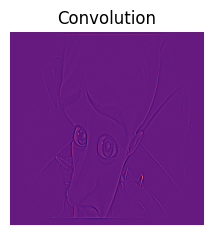

In [ ]:
# Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

Menerapkan layer ReLu

Text(0.5, 1.0, 'Activation')

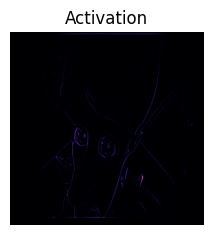

In [ ]:
# activation layer
relu_fn = tf.nn.relu

# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

Menerapkan layer pooling

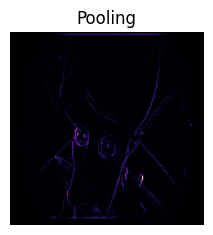

In [ ]:
# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()